# 18.C21 Problem Set 3 Solutions

## Problem 1 (5+5+5+5 points) 

This problem concerns two different analogues of *piecewise-linear* functions in *two-dimensions*, for functions $f(\vec x)$ on $\vec{x} = (x,y) \in \mathbb{R}^2$.

**(a)** Suppose that you have three data points on a right triangle: $\vec{x}_1 = (0,0)$, $\vec{x}_2 = (1,0)$, and $\vec{x}_3 = (0,1)$, with corresponding function values $f_i = f(\vec{x}_i)$ for $i = 1,2,3$.  Derive a formula for the linear (technically "affine") interpolant (a plane) $p(\vec{x})$ that goes through these three points, i.e. $p(\vec{x}) = c_0 + \vec{c}^T \vec{x}$ for some coefficients $c_0,c_1,c_2$ computed from $p(\vec{x}_i) = f_i$.

**(b)** Suppose that we have three *arbitrary* non-collinear points $\vec{x}_i \in \mathbb{R}^2$.  Derive a formula for a matrix $A \in \mathbb{R}^{2 \times 2}$ and a vector $\vec{b} \in \mathbb{R}^2$ such that $A\vec{x} + \vec{b}$ maps $\vec{x}_1, \vec{x}_2, \vec{x}_3 \mapsto (0,0), (1,0), (0,1)$ (it maps an arbitrary triangle onto a "reference" triangle).   Explain how you can combine this transformation with your answer from (a) to do linear interpolation from $f_i = f(\vec{x}_i)$ evaluated on an arbitrary triangle of points $\vec{x}_1, \vec{x}_2, \vec{x}_3$.

*Comment*: In [finite-element methods](https://en.wikipedia.org/wiki/Finite_element_method), where space is divided into an arbitrary mesh of triangles/tetrahedras/etcetera "elements", this kind of technique allows one to first work out the formulas on a simple "reference" element and then map every other element to this reference.

**(c)** Suppose that you have *four* data points on a rectangle: $\vec{x}_1 = (x_1,y_1)$, $\vec{x}_2 = (x_2,y_1)$, $\vec{x}_3 = (x_1,y_2)$, and $\vec{x}_4 = (x_2,y_2)$, with corresponding function values $f_i = f(\vec{x}_i)$ for $i = 1,2,3,4$.  Form the piecewise linear interpolant $p_1(x)$ on the line segment between $\vec{x}_1$ and $\vec{x}_2$ as in class, and the piecewise linear interpolant $p_2(x)$ between $\vec{x}_3$ and $\vec{x}_4$.   Now, linearly interpolate the functions $p_1$ and $p_2$ in $y$ to give the formula for a "bilinear" interpolation function $p(x,y)$.   Is $z = p(x,y)$ a plane?  Why or why not?

**(d)** Suppose you have a 2d grid of points $(x_i, y_j)$ for $i, j = 1, \ldots, \ell$ as in class (with $x_i$ and $y_j$ sorted in ascending order), and on *each rectangle* $(x_{i},y_{j}),(x_{i+1},y_{j}),(x_{i},y_{j+1}),(x_{i+1},y_{j+1})$ in the grid you form a bilinear interpolation as in part (c).  This is *piecewise* bilinear interpolation, defining a function $p(x,y)$ everywhere in the grid.  Explain how, for an arbitary grid, you can evaluate $p(x,y)$ in $O(\log \ell)$ computational cost (hint: look up "binary search"), and for an equispaced grid ($x_i = x_0 + i\Delta x$ and $y_j = y_0 + j \Delta y$) you can evaluate $p(x,y)$ in $O(1)$ computational cost.

(Technically, this is computational cost in the so-called "RAM model" where we assume that looking up $x_i$ or $y_j$ given $i$ or $j$ is $O(1)$.)

### Solution:

**(a)** we can set this up as a linear equation in three unknowns, where each rw is $p(\vec{x}) = c_0 + \vec{c}^T \vec{x}$
for one of the three points $\vec{x}$:
$$
\begin{pmatrix}
1 & 0 & 0 \\ 1 & 1 & 0 \\ 1 & 0 & 1
\end{pmatrix} \begin{pmatrix} c_0 \\ c_1  \\ c_2 \end{pmatrix} = \begin{pmatrix} f_1 \\ f_2  \\ f_3 \end{pmatrix}
$$
This is easy to solve because it is *lower triangular* (with 1's on the diagonal so no divisions are required), so we can solve it by "forward-substitution" one row at a time, top to bottom, obtaining the solution:
$$
\begin{pmatrix} c_0 \\ c_1  \\ c_2 \end{pmatrix} = \boxed{\begin{pmatrix} f_1 \\ f_2 - f_1  \\ f_3 - f_1 \end{pmatrix}} \, .
$$

**(b)** First, we can choose $\boxed{\vec{b} = -A\vec{x}_1}$ so that $A\vec{x} + \vec{b} = A(\vec{x} - \vec{x}_1)$ shifts $\vec{x}_1$ to $(0,0)$ as required.  Now, to find $A$, we can write the remaining equations:
$$
A(\vec{x_2} - \vec{x}_1) = \begin{pmatrix} 1 \\ 0 \end{pmatrix} \text{  and  } A(\vec{x_3} - \vec{x}_1) = \begin{pmatrix} 0 \\ 1 \end{pmatrix}
$$
which can be combined into a single equation:
$$
A \underbrace{\begin{pmatrix}\vec{x_2} - \vec{x}_1 & \vec{x_3} - \vec{x}_1 \end{pmatrix}}_{2 \times 2 \text{ matrix}} = \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix} = I \implies \boxed{A = \begin{pmatrix}\vec{x_2} - \vec{x}_1 & \vec{x_3} - \vec{x}_1 \end{pmatrix}^{-1}} \, .
$$
We could go further and write out $A$ explicitly using the well-known formula for the inverse of a 2×2 matrix, but that's not required.

**(c)** As in class, we have the 1d interpolants:
$$
p_1(x) = f_1 + \frac{x - x_1}{x_2 - x_1} (f_2 - f_1)
$$
and 
$$
p_2(x) = f_3 + \frac{x - x_1}{x_2 - x_1} (f_4 - f_3) \, .
$$
Now, we want to interpolate the interpolants, i.e.
$$
\boxed{p(x,y) = p_1(x) + \frac{y - y_1}{y_2 - y_1} \left( p_2(x) - p_1(x) \right) } \, .
$$
Since the $x$ dependence of both $p_1$ and $p_2$ is the same, we could factor it out to write this formula in various forms, e.g.:
$$
p(x,y) = f_1 + \frac{y - y_1}{y_2 - y_1} (f_3 - f_1) + \frac{x - x_1}{x_2 - x_1} \left[ f_2 - f_1 + \frac{y - y_1}{y_2 - y_1} \left( f_4 - f_3 - f_2 + f_1 \right)  \right] \, .
$$

This is **not a plane**.  A plane would be an *affine* (linear + constant) function of the form $c_0 + c_1 x + c_2 y$ as in part (a), but this function clearly contains $xy$ terms.  It is a "bilinear" surface, a form of (doubly) [ruled surface](https://en.wikipedia.org/wiki/Ruled_surface).

**(d)** For an arbitrary grid of points, we can search the $x_i$ array to find the interval $[x_i, x_{i+1})$ containing $x$ by a [binary search](https://en.wikipedia.org/wiki/Binary_search) in $O(\log \ell)$ operations (comparisons and array lookups and index calculations); you can just quote this result, and need not copy the algorithm (which is widely described online).  Similarly for $y$ to find the interval $[y_j, y_{j+1})$ containing $y$.   Once you find this interval, evaluating the formula from part (c) requires $O(1)$ operations (independent of $\ell$) so the overall cost is just $O(\log \ell)$ as suggested.

For an equispaced grid $x_i = x_0 + i \Delta x$, to find $[x_i, x_{i+1})$ we can just compute $i = \lfloor \frac{x - x_0}{\Delta x} \rfloor$, where $\lfloor \cdots \rfloor$ is the [floor function](https://en.wikipedia.org/wiki/Floor_and_ceiling_functions) — that is, division by $\Delta x$ rounded down — provided as `floor` in most programming languages.  e.g. in Julia, you can do `floor(Int, (x - x₀) / Δx)`.  Similarly, $j = \lfloor \frac{y - y_0}{\Delta y} \rfloor$ is the index of the interval $[y_j, y_{j+1})$ containing $y$.  This calculation is $O(1)$, independent of $\ell$, as claimed — piecewise bilinear (or bicubic etc.) interpolation on an equispaced grid is fast!

## Problem 2 (5+5+5 points)

In this problem, you will try out some 2d interpolation algorithms on ["Franke's function"](https://www.sfu.ca/~ssurjano/franke2d.html), a common test function for 2d interpolation, and work out their convergence rates:

\begin{align}
\text{franke}(x_1, x_2) =\;&
0.75 \exp\!\left(-0.25 \left[(9x_1 - 2)^2 + (9x_2 - 2)^2\right]\right) \\
&{} + 0.75 \exp\!\left(-\frac{(9x_1 + 1)^2}{49} - \frac{9x_2 + 1}{10}\right) \\
&{} + 0.5 \exp\!\left(-0.25 \left[(9x_1 - 7)^2 + (9x_2 - 3)^2\right]\right) \\
&{} - 0.2 \exp\!\left(-(9x_1 - 4)^2 - (9x_2 - 7)^2\right).
\end{align}

evaluated in a box $x_1 \in [0,1]$ and $x_2 \in [0,1]$.

Code for this function is given below in Julia and Python/Numpy:

In [1]:
# Julia:To apply it to arrays, use f.(x1, x2)

function franke(x1, x2)
    return 0.75 * exp(-0.25 * ((9 * x1 - 2)^2 + (9 * x2 - 2)^2)) +
           0.75 * exp(-(9 * x1 + 1)^2 / 49 - (9 * x2 + 1) / 10) +
           0.5  * exp(-0.25 * ((9 * x1 - 7)^2 + (9 * x2 - 3)^2)) -
           0.2  * exp(-(9 * x1 - 4)^2 - (9 * x2 - 7)^2)
end

# it's convenient to also let x = [x1,x2] be a vector
franke(x) = franke(x[1], x[2])

franke (generic function with 2 methods)

In [ ]:
# Python: inputs x1 and x2 are arrays

import numpy as np

def franke(x1, x2):
    x1 = np.asarray(x1)
    x2 = np.asarray(x2)

    return (
        0.75 * np.exp(-0.25 * ((9 * x1 - 2)**2 + (9 * x2 - 2)**2)) +
        0.75 * np.exp(-(9 * x1 + 1)**2 / 49 - (9 * x2 + 1) / 10) +
        0.5  * np.exp(-0.25 * ((9 * x1 - 7)**2 + (9 * x2 - 3)**2)) -
        0.2  * np.exp(-(9 * x1 - 4)**2 - (9 * x2 - 7)**2)
    )

Now, form various interpolants $p(x_1,x_2)$ for this function and compute the *maximum* error $\Vert \text{franke} - p \Vert_\infty$ evaluated on a $1000 \times 1000$ equispaced grid of points in $[0,1] \times [0,1]$.

Plot (on a log-log or semi-log scale as appropriate) this error versus $n$, where $n$ is the number of interpolation points, and indicate whether you observe a power law (which? why?) or exponential convergence.  (Use enough data points to make the dependence clear.)

**(a)** Bilinear interpolation from an equispaced grid of $\ell \times \ell$ ($n = \ell^2$) points.  You can use e.g. [`BasicInterpolators.BilinearInterpolator`](https://markbaum.xyz/BasicInterpolators.jl/dev/2d/#BasicInterpolators.BilinearInterpolator) in Julia [`scipy.interpolate.interp2d`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp2d.html) in Python.

**(b)** 2d polynomial interpolation from Chebyshev points in $x_1,x_2$.  You can use e.g. [FastChebInterp.jl](https://github.com/JuliaMath/FastChebInterp.jl) in Julia or e.g. `numpy.polynomial.chebyshev.chebfit` (this is 1d, but then you do it twice along both directions) and `numpy.polynomial.chebyshev.chebval2d` in Numpy.

**(c)** Using radial basis functions (RBFs) with the Gaussian kernel $\Phi(\vec{x}) = \exp(-\Vert \vec{x} \Vert^2 / R^2)$ at $n$ uniformly chosen *random* points in the square (`x1, x2 = rand(n), rand(n)` in Julia, or `numpy.random.rand` in Numpy).  Choose $R = 1/\sqrt{n}$ so that it is proportional to the average spacing of the points.  Don't use an RBF library here: implement the "Vandermonde-like" matrix and solve for the coefficients yourself.   Instead of the *maximum* error, plot the *root-mean-square* error (again on a $1000\times 1000$ equispaced grid).  To reduce the noise from the random points, repeat $10$ times for each $n$ and average the error.

Note: for RBFs via a Vandermonde matrix, you won't be able to go much past $n=1000$ points before it gets too expensive.

### Solution:

Here, we solve the problem using Julia, loading some helper packages.

In [2]:
using BasicInterpolators, FastChebInterp, StaticArrays

To begin with, we'll create our 1000x1000 grid for convergence tests, and plot the Franke function while we are at it to see what it looks like (this was not required).  Julia's [broadcasting "dot" syntax](https://docs.julialang.org/en/v1/manual/functions/#man-vectorized) is convenient here.

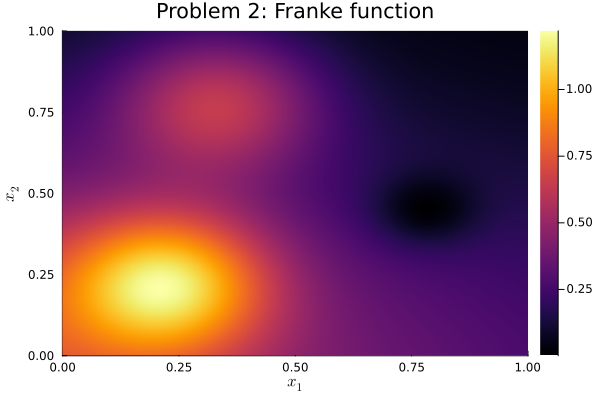

In [3]:
# test grid for convergence tests:
x1 = x2 = range(0,1,length=1000)
xtest = SVector.(x1, x2')
franke_test = franke.(xtest)

using Plots, LaTeXStrings
heatmap(x1, x2, franke_test, xlabel=L"x_1", ylabel=L"x_2", colorbar=true,
        title="Problem 2: Franke function")

**(a)** Bilinear interpolation, using `BilinearInterpolator` from the BasicInterpolators package.

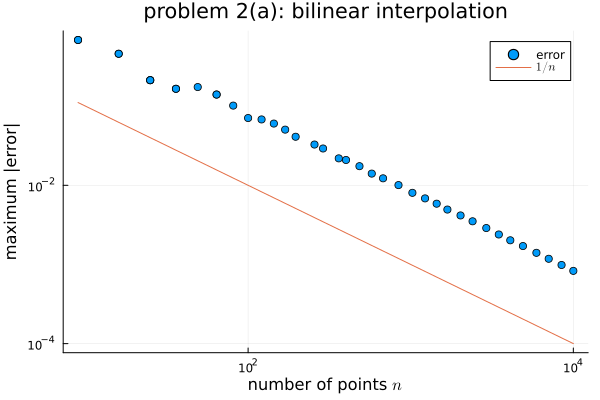

In [4]:
ℓ = round.(Int, sqrt.(10 .^ range(1,4,length=40)))
err_bilinear = map(ℓ) do ℓ
    p = BilinearInterpolator(franke, 0, 1, ℓ, 0, 1, ℓ)
    maximum(abs.(p.(x1, x2') .- franke_test))
end

scatter(ℓ .^ 2, err_bilinear, xscale=:log10, yscale=:log10, label="error",
        title="problem 2(a): bilinear interpolation",
        xlabel=L"number of points $n$", ylabel="maximum |error|")
plot!(ℓ .^ 2, ℓ .^ -2, label=L"1/n")

As we can see, the convergence is $1/n$.  Why is this?  

Remember from problem 1 that bilinear interpolation is just piecewise linear interpolation twice, in $x$ and then in $y$.  From class, the error of piecewise linear interpolation is $O(\Delta x^2)$ for the $x$ interpolation, and similarly $O(\Delta y^2)$ for $y$, so the overall error should be $O(\Delta x^2) + O(\Delta y^2) = O(1/\ell^2) = O(1/n)$ for an $\ell \times \ell$ grid with $n = \ell^2$.

**(b)** Now, let's try 2d polynomial interpolation from Chebyshev points (or "Chebyshev interpolation"), via the FastChebInterp package.

From class, we expect (at least) exponential convergence (since the function being interpolated is smooth, so we plot on a log–linear scale.    Indeed, it looks roughly like a straight line, corresponding to exponentially fast convergence!  We get more than 10 digits of accuracy with only about 2000 points, compared to bilinear interpolation which obtained 4 digits from $10^4$ points.

(This particular function is an [entire function](https://en.wikipedia.org/wiki/Entire_function), so the convergence might actually be *faster* than exponential, but it is hard to see whether this is true without going to much higher precision.)

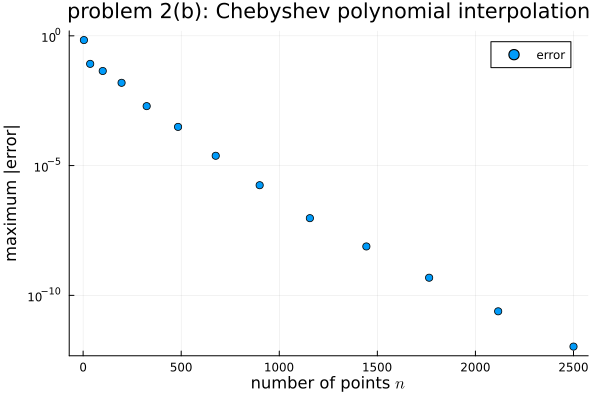

In [5]:
ℓ = 2:4:50
err_cheb = map(ℓ) do ℓ
    lb, ub = [0,0], [1,1]
    x = chebpoints((ℓ,ℓ), lb, ub)
    p = chebinterp(franke.(x), lb, ub)
    maximum(abs.(p.(xtest) .- franke_test))
end

scatter(ℓ .^ 2, err_cheb, yscale=:log10, label="error",
        title="problem 2(b): Chebyshev polynomial interpolation",
        xlabel=L"number of points $n$", ylabel="maximum |error|")

**(c)** For the suggested RBFs, as in class we'll need to solve a linear system $Ac = f$ for the coefficients, where the matrix $A$ has entries
$$
A_{ij} = \Phi(\vec x_i - \vec x_j)
$$
In Julia, we can again construct all of these things with broadcasting syntax, where we store the random points $\vec x_i$ as a "vector of vectors" `x` (actually using a fancy type called `SVector` from the StaticArrays package that is super-efficient for small fixed-size vectors like the 2-component vectors here).  By calling `permutedims(x)` to make a "row-vector `xrow`" out of `x`, we can use broadcasting to combine `x` and `xrow` into a matrix.  Or we could have not been so "fancy" and just used a loop or something.

I'll also print out the condition number of the matrices to check that they are well-conditioned.

This is not really a good way to use RBFs.  By shrinking $R$ with $n$, it turns out there will always be "holes" in between random sample points where the RBFs don't reach, and the function value stays small (this is plotted below).  So, we will see that it doesn't actually converge with $n$... the error decays a bit at first, perhaps proportional to $1/\sqrt{n}$, but then levels out at about 10\%.

The right way to use the RBF is to keep $R$ fixed as we increase $n$, so that the basis functions cover the whole domain as $n$ increases.  But then the matrix becomes increasingly ill-conditioned and you need to define some regularization to choose *which* solution you want.  A good way to do this is to augment the basis with a few low-order polynomials like $x_1,x_2, x_1 x_2, \ldots$ as described in class, and then find the minimum-norm solution.  You were *not* required to do this, but the results are shown below, and demonstrate quite fast convergence (though it's hard to tell the precise rate with $n \le 1000$).

In [6]:
using Statistics # for mean
using LinearAlgebra # for cond

n = round.(Int, 10 .^ range(1, 3, length=20))
norm²(x) = x'x
err_rbf = map(n) do n
    rms_mean = mean(1:10) do _
        x = SVector.(rand(n), rand(n)) # n random points
        xrow = permutedims(x) # for broadcasting the matrix
        R = 1/sqrt(n)
        A = exp.(.-norm².(x .- xrow) ./ R^2)
        c = A \ franke.(x)
        p = exp.(.-norm².(vec(xtest) .- xrow) ./ R^2) * c
        rms = sqrt(mean((p .- vec(franke_test)).^2))
        @show n, cond(A), rms
        rms
    end
    @show n, rms_mean
    rms_mean
end

(n, cond(A), rms) = (10, 78.02979676794408, 0.2003630311171149)
(n, cond(A), rms) = (10, 13.48050593872916, 0.18093510851623743)
(n, cond(A), rms) = (10, 36.88908649407373, 0.1909681271231531)
(n, cond(A), rms) = (10, 874.796894971484, 0.10662524818833835)
(n, cond(A), rms) = (10, 222.06349395700693, 0.09495467723204769)
(n, cond(A), rms) = (10, 1216.5815372901034, 0.24842186091286664)
(n, cond(A), rms) = (10, 268.6555837796218, 0.15990753443162548)
(n, cond(A), rms) = (10, 5306.25826993522, 0.3098431239009197)
(n, cond(A), rms) = (10, 168.86967100560844, 0.3029271849017237)
(n, cond(A), rms) = (10, 102.09138811637091, 0.11543884698287628)
(n, cond(A), rms) = (10, 240.26414235754822, 0.2074464385697663)
(n, rms_mean) = (10, 0.19174681507595548)
(n, cond(A), rms) = (13, 61.6691556454119, 0.10152526284514657)
(n, cond(A), rms) = (13, 1182.6269685228822, 0.3949807215876064)
(n, cond(A), rms) = (13, 88.90148311368992, 0.16669220676935806)
(n, cond(A), rms) = (13, 62.08693668609298, 0.17435

20-element Vector{Float64}:
 0.19174681507595548
 0.14733398205654397
 0.15431047299776884
 0.10402102652165882
 0.13603357926117382
 0.09989175715510443
 0.11066170194743055
 0.1208135277938566
 0.10004232813774308
 0.0890595238715107
 0.09070478512939013
 0.09524463373001645
 0.09850857403676862
 0.08807982343400851
 0.09753119592491065
 0.08342693173459714
 0.09338118916139712
 0.09329656103510783
 0.08581787128573667
 0.08824627314314269

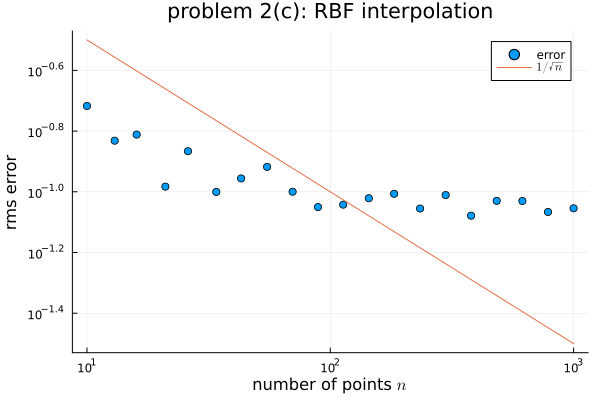

In [7]:
scatter(n, err_rbf, xscale=:log10, yscale=:log10, label="error",
        title="problem 2(c): RBF interpolation",
        xlabel=L"number of points $n$", ylabel="rms error")
plot!(n, 1 * n .^ -0.5, label=L"1/\sqrt{n}")

To illustrate why it's failing to converge, let's plot the interpolant for $n=1000$, and you can see lots of "dark spots" where none of the basis functions are reaching:

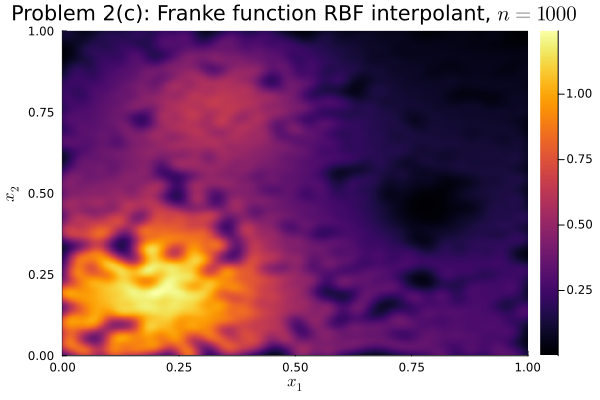

In [8]:
p = let n = 1000
    x = SVector.(rand(n), rand(n)) # n random points
    xrow = permutedims(x) # for broadcasting the matrix
    R = 1/sqrt(n)
    A = exp.(.-norm².(x .- xrow) ./ R^2)
    c = A \ franke.(x)
    p = exp.(.-norm².(vec(xtest) .- xrow) ./ R^2) * c
    reshape(p, size(franke_test)...)
end

heatmap(x1, x2, p, xlabel=L"x_1", ylabel=L"x_2", colorbar=true,
        title=L"Problem 2(c): Franke function RBF interpolant, $n=1000$")

A better way to do this (which was *not* required for students) is to

1. Keep $R$ fixed as you increase $n$, e.g. $R=0.2$ below
2. Augment the RBF basis with a few low-order polynomials (below: $x_1, x_2, x_1 x_2, x_1^2, x_2^2$)
3. solve the resulting ill-conditioned problem in some regularized way; here we just use a minimum-norm solution (which Julia does via "pivoted QR" factorization); we could also use a truncated SVD.
   
The results are shown below, and show very fast convergence once $n$ becomes $\gtrsim 100$, large enough for the radial basis functions to begin to overlap, perhaps $O(1/n^4)$ though it is hard to tell for sure with such a small range of $n$ values.

In [9]:
xtest1 = vec(getindex.(xtest, 1))
xtest2 = vec(getindex.(xtest, 2))
R = 0.2 # fixed R
err_rbf2 = map(n) do n
    rms_mean = mean(1:10) do _
        x1, x2 = rand(n), rand(n)
        x = SVector.(x1, x2) # n random points
        xrow = permutedims(x) # for broadcasting the matrix\
        A = exp.(.-norm².(x .- xrow) ./ R^2)
        P = [x1 x2 x1.*x2 x1.^2 x2.^2]
        A = [A P] # augment with additional columns: a few polynomials
        c = A \ franke.(x) # minimum-norm solution via QR
        # alternatively: regularized minimum-norm solution via truncated SVD
        # F = svd(A)
        # F.S[F.S .< 1e-12 * F.S[1]] .= 0 # truncate SVD
        # c = F \ franke.(x) # SVD-based pseudo-inverse solution = minimum-norm, modulo truncation
        p = exp.(.-norm².(vec(xtest) .- xrow) ./ R^2) * c[1:n]
        Ptest = [xtest1 xtest2 xtest1.*xtest2 xtest1.^2 xtest2.^2]
        p += Ptest * c[n+1:end] # add in polynomial terms
        rms = sqrt(mean((p .- vec(franke_test)).^2))
        @show n, rms
        rms
    end
    @show n, rms_mean
    rms_mean
end

(n, rms) = (10, 0.15763649109715067)
(n, rms) = (10, 0.3843900512717749)
(n, rms) = (10, 0.3012144834407856)
(n, rms) = (10, 0.1590373953981071)
(n, rms) = (10, 0.3293314081858021)
(n, rms) = (10, 0.1480932788897338)
(n, rms) = (10, 0.3577097169171436)
(n, rms) = (10, 0.2678777818684892)
(n, rms) = (10, 0.3257127716970802)
(n, rms) = (10, 0.1962905628796068)
(n, rms) = (10, 0.33326290348901755)
(n, rms_mean) = (10, 0.2802920354037541)
(n, rms) = (13, 0.15977883123105036)
(n, rms) = (13, 0.21542558766143624)
(n, rms) = (13, 0.1966510744348059)
(n, rms) = (13, 0.21409846191778154)
(n, rms) = (13, 0.197456776057081)
(n, rms) = (13, 0.16902904214897282)
(n, rms) = (13, 0.3160799771320904)
(n, rms) = (13, 0.2343657588173668)
(n, rms) = (13, 0.10658681459403753)
(n, rms) = (13, 0.3092629879044562)
(n, rms) = (13, 0.12734827113651237)
(n, rms_mean) = (13, 0.2086304751804541)
(n, rms) = (16, 0.2616899084002483)
(n, rms) = (16, 0.09390961202469343)
(n, rms) = (16, 0.13267850695327948)
(n, rms) 

20-element Vector{Float64}:
 0.2802920354037541
 0.2086304751804541
 0.20026948830535893
 0.12931548404248555
 0.0992617522223462
 0.09603235283617759
 0.06826941171143625
 0.06839187892069507
 0.0756518112273229
 0.03877584715725805
 0.03708276326485043
 0.027014830915780656
 0.03314436724159104
 0.018866710578295524
 0.004726221499434309
 0.0021970626552133585
 0.001132015597722976
 0.00016516470458478145
 8.448340356239831e-5
 5.405929891746016e-5

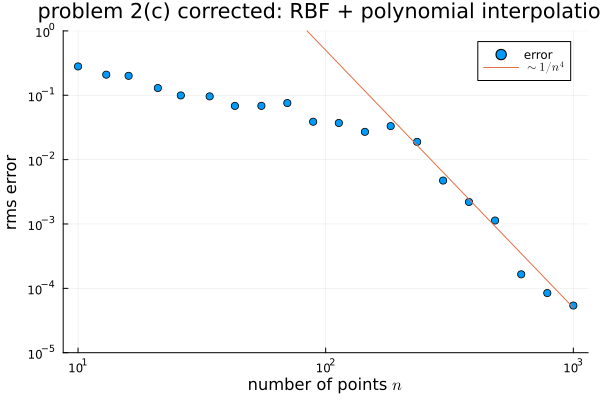

In [10]:
scatter(n, err_rbf2, xscale=:log10, yscale=:log10, label="error",
        title="problem 2(c) corrected: RBF + polynomial interpolation",
        xlabel=L"number of points $n$", ylabel="rms error")
plot!(n, 5e7 * n .^ -4, label=L"\sim 1/n^4", ylim=(1e-5, 1))

## Problem 3 (4+4+4+4 points)

(Based on [exercise 5.6.1](https://fncbook.com/integration/#problem-integration-tests) from the FNC book.)

Integrate the following functions numerically using *both* the trapezoidal rule and Clenshaw-Curtis quadrature for $n+1$ points, and **plot the relative error versus n** (compared to the exact result provided).  Identify whether it is power-law (which?) or exponential dependence (use a log–log or semi-log scale as appropriate).

A function is provided below in both Julia and Python to compute the Clenshaw-Curtis quadrature points $x_k$ and weights $w_k$ for a given length $n$ (supporting even $n$ only) for integration on $[-1,+1]$.  You should implement the trapezoidal rule yourself (it is trivial).

**(a)** $\int_0^1 x \log(1+x) \, dx = 1/4$.

**(b)** $\int_0^1 x^2 \tan^{-1}(x) \, dx = \frac{\pi - 2 + 2\log 2}{12}$.

**(c)** $\int_0^{\pi/2} e^x \cos(x) \, dx = \frac{e^{\pi/2} - 1}{2}$.

**(d)** $\int_0^1 \sqrt{1 - x^2} \, dx = \pi/4$.  Why is this function not so nice, even for Clenshaw–Curtis?

The following is Julia and Python code to compute these Clenshaw–Curtis points $x_n$ and weights $w_n$ for any even $n > 0$.  Given `x, w = clenshaw_curtis(n)` and a function $f(x)$, you can then estimate $\int_{-1}^{+1} f(x) dx$ by `sum(f.(x) .* w)` in Julia and by `numpy.sum(map(f, x) * w)` in Python.

You will need to do a change of variables (as in class) to map these to points and weights for an arbitrary integration interval $[a,b]$.

In [11]:
# Julia code:
import FFTW
function clenshaw_curtis(N)
    iseven(N) && N > 0 || throw(ArgumentError("this implementation requires even N > 0"))
    x = cos.(range(0, pi, length=N+1)) # Chebyshev points
    k = 0:N÷2
    d = @. 2 / (1-4k^2) # cosine integrals
    w = FFTW.r2r(d, FFTW.REDFT00) / N # type-I DCT
    w[1] /= 2
    return x, [w; reverse(w[1:end-1])]
end

clenshaw_curtis (generic function with 1 method)

In [ ]:
# Python code:
import numpy as np
from scipy.fft import dct
def clenshaw_curtis(N):
    if N <= 0 or N % 2 != 0:
        raise ValueError("this implementation requires even N > 0")
    x = np.cos(np.linspace(0, np.pi, N + 1)) # Chebyshev points
    k = np.arange(0, N // 2 + 1)
    d = 2 / (1 - 4 * k**2) # cosine integrals
    w = dct(d, type=1) / N
    w[0] /= 2
    return x, np.concatenate([w, np.flip(w[0:-1])])

### Solution:

First, we'll implement a couple of helper functions that take a function `f`, an interval `(a,b)`, and `n`, and implement Clenshaw–Curtis quadrature (via  change of variables to map to $[-1,+1]$) and the trapezoidal rule (via a simple weighted sum):

In [12]:
function clencurt(f, a,b, n)
    x, w = clenshaw_curtis(n)
    return (b-a)/2 * sum((f.((x .+ 1) .* ((b-a)/2)) .+ a) .* w)
end
function trapz(f, a,b, n)
    x = range(a, b, length=n+1)
    Δx = step(x)
    return Δx * ((f(a)+f(b))/2 + sum(f, x[2:end-1]))
end

relerr(x, exact) = abs(x - exact) / abs(exact)

using Plots, Measures

We'll also pick some points: `nlog` are 50 log-spaced points for log–log plots, ranging from $10^1$ to $10^4$, while `nlinear` are 50 equally spaced even points from $n=2$ to $n=100$ for log–linear plots.

In [13]:
nlog = round.(Int, 10 .^ range(1, 4, length=50))
nlinear = 2:2:100

2:2:100

Now we can create the plots for parts (a)–(d).  It's basically the same code for each part, with the only difference being the function `f`, the exact value for comparison, and how we do the plot to best illustrate the dependence.

In parts (a), (b), and (c), the trapezoidal rule has $O(1/n^2)$ error as expected from class, and Clenshaw–Curtis is exponentially convergent because the functions are smooth (analytic).

Part (d) is different, because there is a square-root singularity at an endpoint (where the slope diverges).  In this case, the convergence is slower: $O(1/n^{1.5})$ for the trapezoidal rule, and only $O(1/n^3)$ for Clenshaw–Curtis.

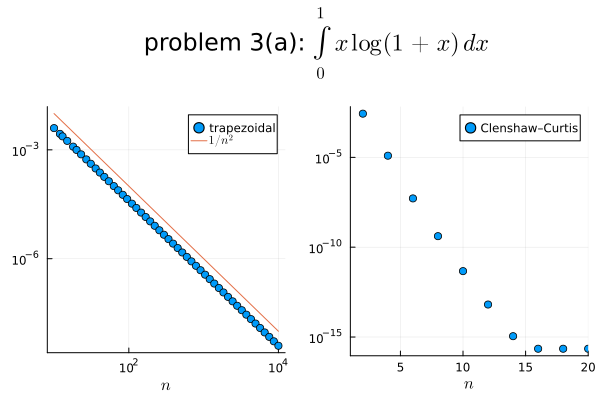

In [14]:
f = x -> x * log1p(x)
exact = 1/4
err_trapz = relerr.(trapz.(f, 0, 1, nlog), exact)
err_clencurt = relerr.(clencurt.(f, 0, 1, nlinear), exact)

p1 = scatter(nlog, err_trapz, xscale=:log10, yscale=:log10, label="trapezoidal", xlabel=L"n")
plot!(p1, nlog, 1 ./ nlog.^2, label=L"1/n^2")

p2 = scatter(nlinear, max.(err_clencurt, eps()), xlim=(1,20), yscale=:log10, label="Clenshaw–Curtis", xlabel=L"n")

plot(p1, p2, layout = (1, 2), top_margin=20mm,
     plot_title = L"problem 3(a): $\int_0^1 x \log(1+x) \, dx$")

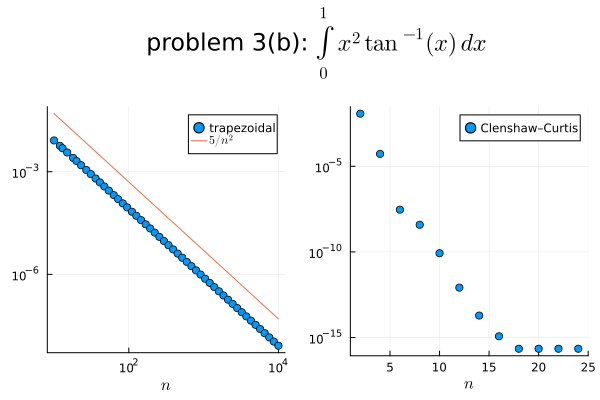

In [15]:
f = x -> x^2 * atan(x)
exact = (pi - 2 + 2*log(2))/12
err_trapz = relerr.(trapz.(f, 0, 1, nlog), exact)
err_clencurt = relerr.(clencurt.(f, 0, 1, nlinear), exact)

p1 = scatter(nlog, err_trapz, xscale=:log10, yscale=:log10, label="trapezoidal", xlabel=L"n")
plot!(p1, nlog, 5 ./ nlog.^2, label=L"5/n^2")

p2 = scatter(nlinear, max.(err_clencurt, eps()), xlim=(1,25), yscale=:log10, label="Clenshaw–Curtis", xlabel=L"n")

plot(p1, p2, layout = (1, 2), top_margin=20mm,
     plot_title = L"problem 3(b): $\int_0^1 x^2 \tan^{-1}(x) \, dx$")

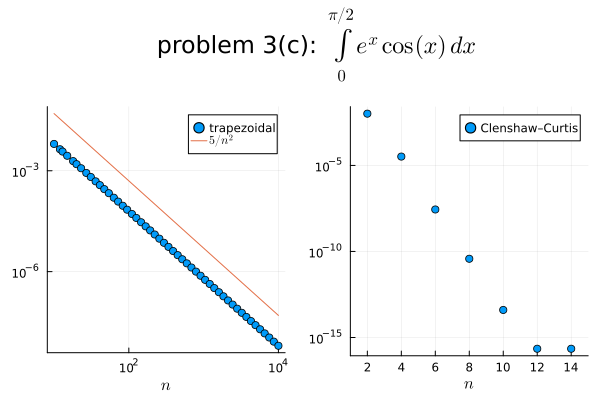

In [16]:
f = x -> exp(x) * cos(x)
exact = expm1(pi/2)/2
err_trapz = relerr.(trapz.(f, 0, pi/2, nlog), exact)
err_clencurt = relerr.(clencurt.(f, 0, pi/2, nlinear), exact)

p1 = scatter(nlog, err_trapz, xscale=:log10, yscale=:log10, label="trapezoidal", xlabel=L"n")
plot!(p1, nlog, 5 ./ nlog.^2, label=L"5/n^2")

p2 = scatter(nlinear, max.(err_clencurt, eps()), xlim=(1,15), yscale=:log10, label="Clenshaw–Curtis", xlabel=L"n")

plot(p1, p2, layout = (1, 2), top_margin=20mm,
     plot_title = L"problem 3(c): $\int_0^{\pi/2} e^x \cos(x) \, dx$")

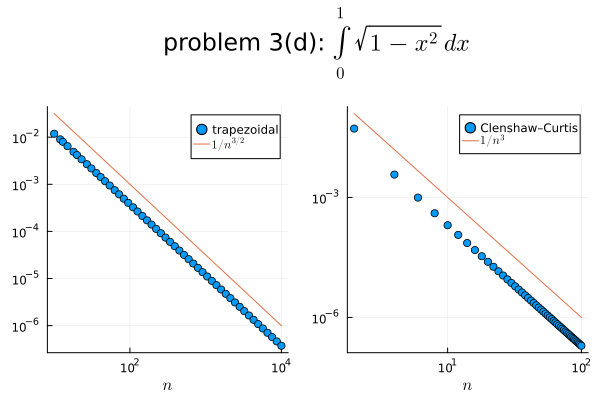

In [17]:
f = x -> sqrt(1 - x^2)
exact = pi/4
err_trapz = relerr.(trapz.(f, 0, 1, nlog), exact)
err_clencurt = relerr.(clencurt.(f, 0, 1, nlinear), exact)

p1 = scatter(nlog, err_trapz, xscale=:log10, yscale=:log10, label="trapezoidal", xlabel=L"n")
plot!(p1, nlog, 1 ./ nlog.^(3/2), label=L"1/n^{3/2}")

p2 = scatter(nlinear, max.(err_clencurt, eps()), xscale=:log10, yscale=:log10, label="Clenshaw–Curtis", xlabel=L"n")
plot!(p2, nlinear, 1 ./ nlinear.^3, label=L"1/n^{3}")

plot(p1, p2, layout = (1, 2), top_margin=20mm,
     plot_title = L"problem 3(d): $\int_0^1 \sqrt{1-x^2} \, dx$")

## Problem 4 (5+5+5 points)

It turns out that the trapezoidal rule (or, equivalently, a simple Riemann sum / rectangle rule) is also quite accurate to compute $\int_{-\infty}^{+\infty} f(x) dx$ for functions $f(x)$ that decay sufficiently rapidly, where you simply truncate the trapezoidal rule when $f(x)$ gets small enough (e.g. when it underflows to zero).  Like periodic functions, this is another case where the trapezoidal/rectangle rule is very accurate, so then the trick is to try to transform arbitrary integrals into this form.

We can make almost *any* function on a *finite* interval equivalent to a *rapidly* decaying function on an *infinite* interval by the change of variables:
$$
\int_{-1}^{+1} f(x)\,dx = \int_{-\infty}^{+\infty} f(x(t)) w(t)\, dt \, ,
$$
where $x(t) = \tanh(\frac{\pi}{2} \sinh t)$ and the Jacobian factor is $w(t) = x'(t) = \frac{\pi}{2} \cosh(t) \operatorname{sech}^2(\frac{\pi}{2} \sinh t)$.

**(a)** Use the trapezoidal rule to numerically integrate $\int_{-\infty}^{+\infty} e^{-x^2} dx = \sqrt{\pi}$, truncating the sum when the integrand underflows to `0.0`.  Plot the relative error as a function of the number $n$ of quadrature points (on a log–log or semi-log scale as appropriate), and identify whether the convergence is power-law (which?) or exponential, or perhaps even faster than exponential.

**(b)** Consider the function $f(x) = \sqrt{1-x^2}$, whose exact integral (similat to problem 3d) is $\int_{-1}^{1} \sqrt{1-x^2} dx = \pi/2$.  Plot the transformed integrand $f(x(t)) w(t)$ for $t \in [-3,3]$ on a semilog scale to see that it is rapidly decaying with $|t|$ as claimed above.  Also include separate curves for $f(x(t))$ and $w(t)$ on the same plot.

**(c)** Integrate $\int_{-\infty}^{+\infty} f(x(t))w(t) \, dt$ for $f(x) = \sqrt{1-x^2}$ using the trapezoidal rule as in part (a), and plot the relative error (vs. the exact answer $\pi/2$) versus $n$ on a log-log or semi-log scale as appropriate.  Is the convergence rate a power law (which?), exponential, or…?  How does it compare to Clenshaw-Curtis in part 3(d)?

### Solution

First, let's write a simple function to use the trapezoidal rule to compute $\int_{-\inf}{\inf} f(x) dx$ with an equispaced interval $\Delta x$: it just keeps adding more points in both directions until $f(x) = 0$.

This is not a completely reliable way to do it in general, of course!  What if $f(x)$ hits zero and then becomes nonzero again?  But it works fine for the examples in this problem, where the integrands are nonnegative and monotonically decaying.  In exact arithmetic, they would *never* be zero, but they hit zero when they underflow the smallest `Float64` value ($\approx 5 \times 10^{-324}$).

(In Python, this could be pretty slow because it is not "vectorized".   A more efficient way to do it, for a known integrand like $exp(-x^2)$ or a known weight function $w(t)$, is simply to calculate ahead of time when they underflow, adn then you can precompute $n$ for a given $\Delta x$.)

In [18]:
function trap_inf(f, Δx)
    s = f(0) * Δx
    x = Δx
    n = 1
    while true
        n += 1
        y = f(x)
        y == 0 && break
        s += y * Δx
        x += Δx
    end
    x = -Δx
    while true
        n += 1
        y = f(x)
        y == 0 && break
        s += y * Δx
        x -= Δx
    end
    return s, n
end

trap_inf (generic function with 1 method)

**(a)** Now, let's apply it to integrate $e^{-x^2}$.   If you play with the axes a bit, it turns out that the convergence is actually *faster* than exponential in $n$ — it is linear if you plot $\log \text{error}$ vs. $n^2$, which means that the convergence is exponential in $n^2$!!

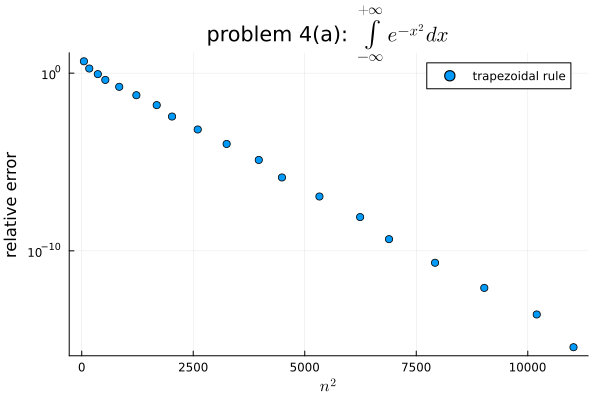

In [19]:
Δx = 10 ./ (1:19)
n_err = map(Δx) do Δx
    s, n = trap_inf(x -> exp(-x^2), Δx)
    n, relerr(s, sqrt(pi))
end

scatter(first.(n_err).^2, last.(n_err), label="trapezoidal rule", yscale=:log10,
        xlabel=L"n^2", ylabel="relative error",
        title=L"problem 4(a): $\int_{-\infty}^{+\infty} e^{-x^2} dx$")

**(b)** Here is a plot of the integrand and the weight functions on a log–linear scale.  Notice that they are *not* straight lines, because these functions are decaying *faster* than exponentially.

In fact, for large $|t|$, it is easy to see that $w(t)$ decays as
$$
w(t) \approx \frac{\pi}{4} e^{|t|} e^{-\frac{\pi}{2} e^{|t|}} \, ,
$$
which is the *exponential of an exponential*.   This "double exponential" decay leads to this method being called a **double-exponential rule**, though it is also known as [tanh–sinh quadrature](https://en.wikipedia.org/wiki/Tanh-sinh_quadrature).

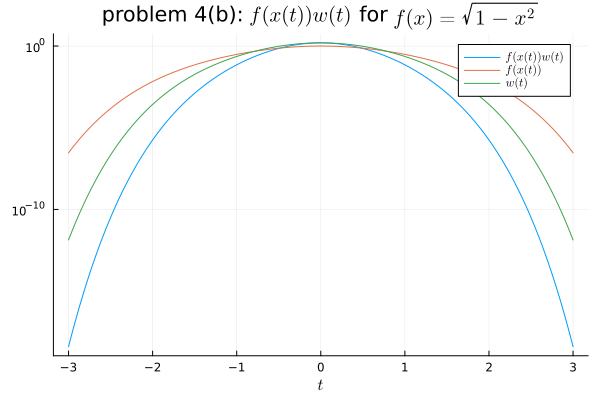

In [20]:
x = t -> tanh(pi/2 * sinh(t))
w = t -> pi/2 * cosh(t) * sech(pi/2 * sinh(t))^2
f = x -> sqrt(1 - x^2)

t = range(-3, 3, length=1000)
plot(t, f.(x.(t)) .* w.(t), yscale=:log10, xlabel=L"t", label=L"f(x(t)) w(t)",
    title=L"problem 4(b): $f(x(t)) w(t)$ for $f(x) = \sqrt{1-x^2}$")
plot!(t, f.(x.(t)), label=L"f(x(t))")
plot!(t, w.(t), label=L"w(t)")

**(c)** Here, we'll plot the convergence vs. $n$ by varying $\Delta t$ inversely linearly. It's not entirely a smooth curve because some changes of $\Delta t$ don't actually change $n$ — there is a minimum change of $\Delta t$ to change $n$ by 1, bringing a new quadrature point inside the underflow regime.

But the basic trend is very clear: it's **roughly exponential** convergence (looks more-or-less linear on a log–linear scale), though the precise asymptotics are a bit trickier to derive.

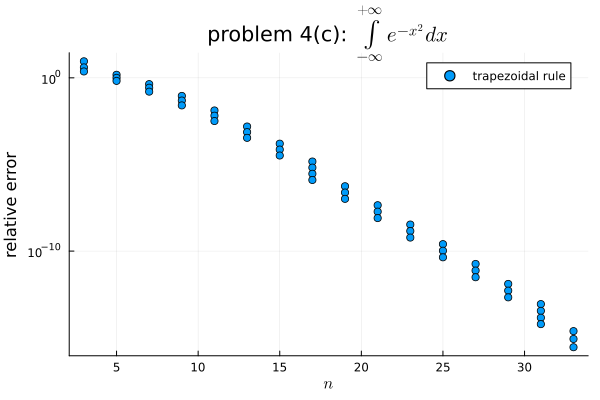

In [21]:
Δt = 10 ./ (1:50)
n_err = map(Δt) do Δt
    s, n = trap_inf(t -> f(x(t)) * w(t), Δt)
    n, relerr(s, pi/2)
end

scatter(first.(n_err), last.(n_err), label="trapezoidal rule", yscale=:log10,
        xlabel=L"n", ylabel="relative error",
        title=L"problem 4(c): $\int_{-\infty}^{+\infty} e^{-x^2} dx$")